In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Statements**

In [34]:
pip install category_encoders

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelBinarizer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
import tensorflow as tf

from scipy import stats

# **Data Cleaning**

In [36]:
df = pd.read_csv('/content/drive/MyDrive/data/emp_train.csv')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [37]:
df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [38]:
df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [40]:
df = df[df['yearsExperience'].notna()]
df = df[df['milesFromMetropolis'].notna()]

In [41]:
df = df.astype(str)

In [42]:
columns = ['companyID','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
for columns in df:
    df[columns] = df[columns].str.lower()

In [43]:
df['companyId'] = df['companyId'].str.replace("comp","")
df['jobId'] = df['jobId'].str.replace("job","")

In [44]:
df2 = pd.read_csv('/content/drive/MyDrive/data/emp_sal.csv')
df2

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
...,...,...
999995,JOB1362685407682,88
999996,JOB1362685407683,160
999997,JOB1362685407684,64
999998,JOB1362685407685,149


In [45]:
df2 = df2.astype(str)

In [46]:
columns = ['jobId']
for columns in df2:
    df2[columns] = df2[columns].str.lower()

In [47]:
df2['jobId'] = df2['jobId'].str.replace("job","")

In [48]:
df2

,jobId,salary
0,1362684407687,130
1,1362684407688,101
2,1362684407689,137
3,1362684407690,142
4,1362684407691,163
...,...,...
999995,1362685407682,88
999996,1362685407683,160
999997,1362685407684,64
999998,1362685407685,149


In [49]:
data = pd.merge(df, df2, on="jobId")

In [50]:
data['jobId'] = data['jobId'].astype(np.int64)
data['companyId'] = data['companyId'].astype(np.int64)
data['yearsExperience'] = data['yearsExperience'].astype(float)
data['milesFromMetropolis'] = data['milesFromMetropolis'].astype(float)
data['salary'] = data['salary'].astype(np.int64)

In [ ]:
data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1362684407687,37,cfo,masters,math,health,10.0,83.0,130
1,1362684407688,19,ceo,high_school,none,web,3.0,73.0,101
2,1362684407689,52,vice_president,doctoral,physics,health,10.0,38.0,137
3,1362684407690,38,manager,doctoral,chemistry,auto,8.0,17.0,142
4,1362684407691,7,vice_president,bachelors,physics,finance,8.0,16.0,163
...,...,...,...,...,...,...,...,...,...
999995,1362685407682,56,vice_president,bachelors,chemistry,health,19.0,94.0,88
999996,1362685407683,24,cto,high_school,none,finance,12.0,35.0,160
999997,1362685407684,23,junior,high_school,none,education,16.0,81.0,64
999998,1362685407685,3,cfo,masters,none,health,6.0,5.0,149


In [ ]:
#profile = ProfileReport(data, title='Pandas Report', html={'style':{'full_width':True}})
#profile

# **EDA**

In [ ]:
data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1362684407687,37,cfo,masters,math,health,10.0,83.0,130
1,1362684407688,19,ceo,high_school,none,web,3.0,73.0,101
2,1362684407689,52,vice_president,doctoral,physics,health,10.0,38.0,137
3,1362684407690,38,manager,doctoral,chemistry,auto,8.0,17.0,142
4,1362684407691,7,vice_president,bachelors,physics,finance,8.0,16.0,163
...,...,...,...,...,...,...,...,...,...
999995,1362685407682,56,vice_president,bachelors,chemistry,health,19.0,94.0,88
999996,1362685407683,24,cto,high_school,none,finance,12.0,35.0,160
999997,1362685407684,23,junior,high_school,none,education,16.0,81.0,64
999998,1362685407685,3,cfo,masters,none,health,6.0,5.0,149


## **General Plots**

<Axes: xlabel='salary', ylabel='Density'>

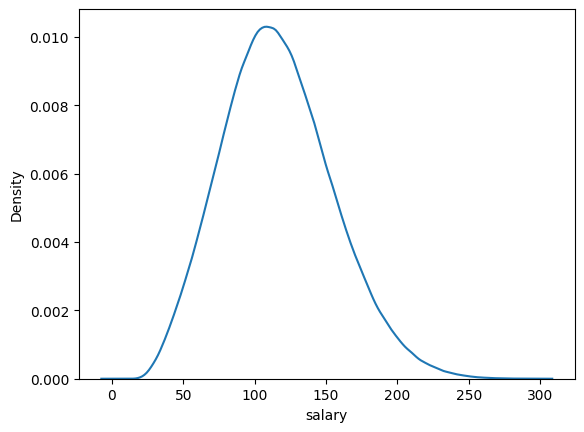

In [ ]:
sns.kdeplot(data['salary'])

<Axes: xlabel='yearsExperience', ylabel='Density'>

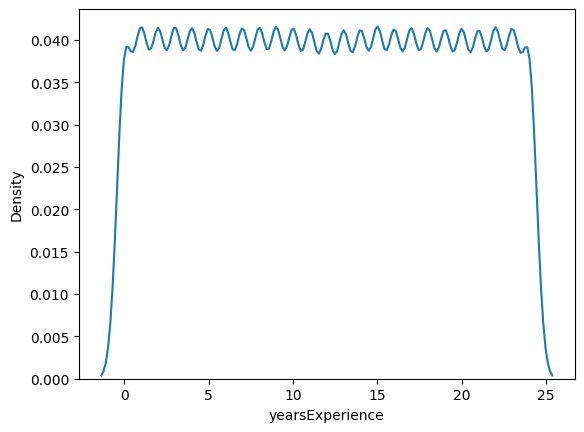

In [ ]:
sns.kdeplot(data['yearsExperience'])

In [ ]:
#sns.pairplot(data=data)

## **Mean Salaries of Employees in Different Categories**

In [ ]:
data['milesFromMetropolis'].unique()

array([83., 73., 38., 17., 16., 31., 24., 70., 54., 68., 30., 79., 29.,
       26., 81.,  8., 91., 43., 66., 99., 96., 62., 69., 63., 40.,  6.,
       23.,  9.,  2., 32., 78., 14., 58., 35., 93., 82., 87., 76., 22.,
       44., 72.,  4., 25., 36.,  5., 71., 65., 53., 13., 33., 55., 61.,
       98., 59., 15., 75., 56., 11., 12., 34., 21., 52., 46., 48., 97.,
       28., 94., 41., 74., 60., 95., 80., 89., 10., 50., 49.,  3., 88.,
       47., 51., 18., 92., 42., 39., 67., 84., 86.,  0., 19., 20., 57.,
       37., 64.,  1., 27., 77., 90., 45., 85.,  7.])

<Axes: ylabel='degree'>

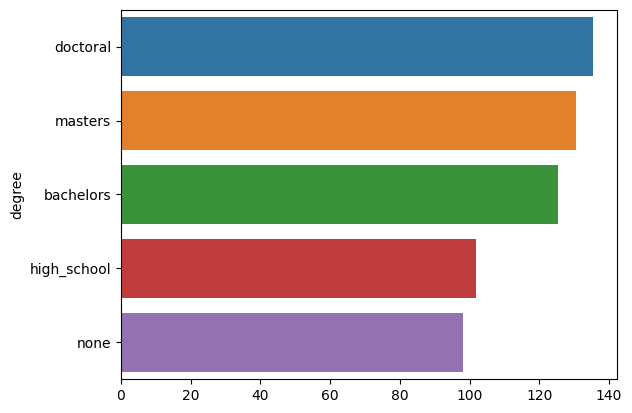

In [ ]:
degree_sal = data.groupby('degree')['salary'].mean().sort_values(ascending=False)
sns.barplot(y=degree_sal.index,x=degree_sal.values)

<Axes: ylabel='jobType'>

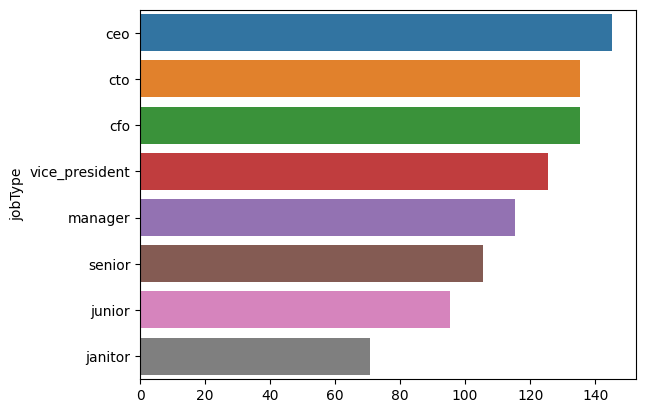

In [ ]:
degree_sal = data.groupby('jobType')['salary'].mean().sort_values(ascending=False)
sns.barplot(y=degree_sal.index,x=degree_sal.values)

<Axes: ylabel='major'>

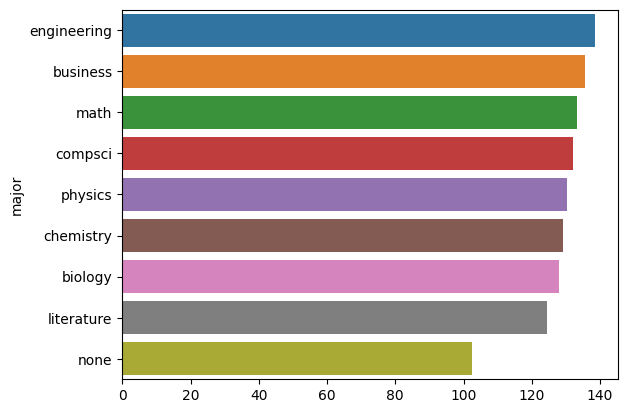

In [ ]:
degree_sal = data.groupby('major')['salary'].mean().sort_values(ascending=False)
sns.barplot(y=degree_sal.index,x=degree_sal.values)

<Axes: ylabel='industry'>

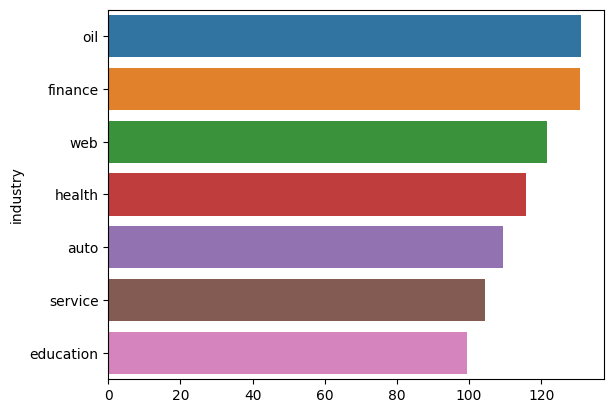

In [ ]:
degree_sal = data.groupby('industry')['salary'].mean().sort_values(ascending=False)
sns.barplot(y=degree_sal.index,x=degree_sal.values)

<Axes: xlabel='yearsExperience'>

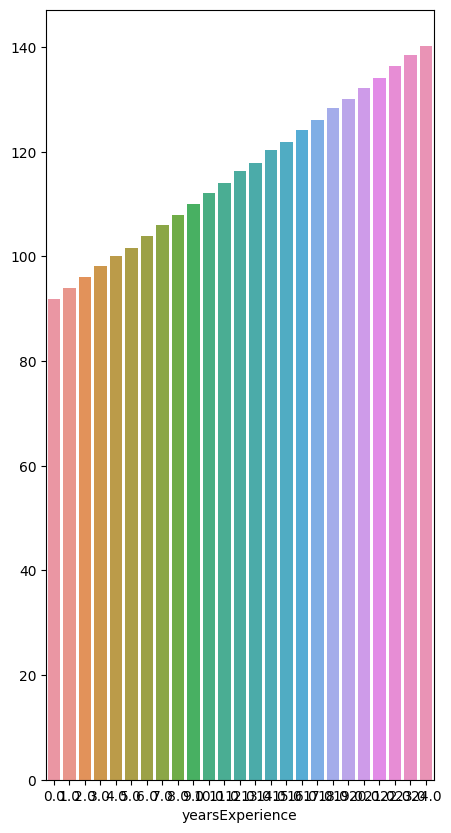

In [ ]:
plt.subplots(figsize=(5,10))
degree_sal = data.groupby('yearsExperience')['salary'].mean().sort_values(ascending=False)
sns.barplot(x=degree_sal.index,y=degree_sal.values)

## **Linear Graphs**

<Axes: xlabel='yearsExperience', ylabel='salary'>

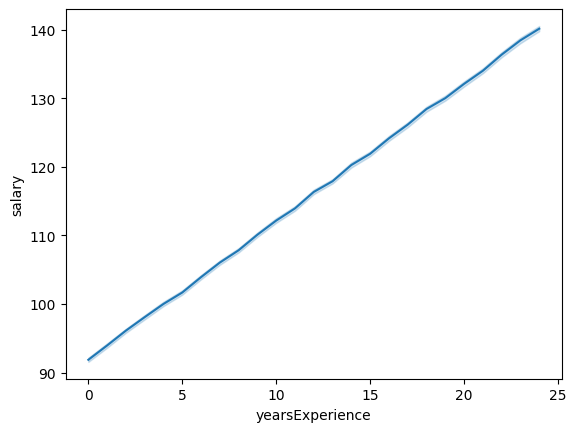

In [ ]:
sns.lineplot(x = 'yearsExperience', y = 'salary', data = data)

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

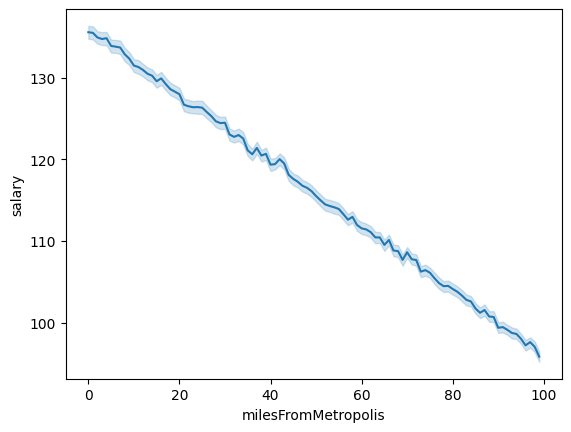

In [ ]:
sns.lineplot(x = 'milesFromMetropolis', y = 'salary', data = data)

## **Correlation & Heatmap**

In [ ]:
data.corr()

<ipython-input-33-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,jobId,companyId,yearsExperience,milesFromMetropolis,salary
jobId,1.000000,0.000360,0.000913,0.001896,-0.000794
companyId,0.000360,1.000000,0.000982,-0.000310,-0.001525
yearsExperience,0.000913,0.000982,1.000000,0.000673,0.375013
milesFromMetropolis,0.001896,-0.000310,0.000673,1.000000,-0.297666
salary,-0.000794,-0.001525,0.375013,-0.297666,1.000000


<ipython-input-34-74d7aefcdce6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['jobId','companyId'],axis=1).corr(),annot = True, fmt = '0.0%')


<Axes: >

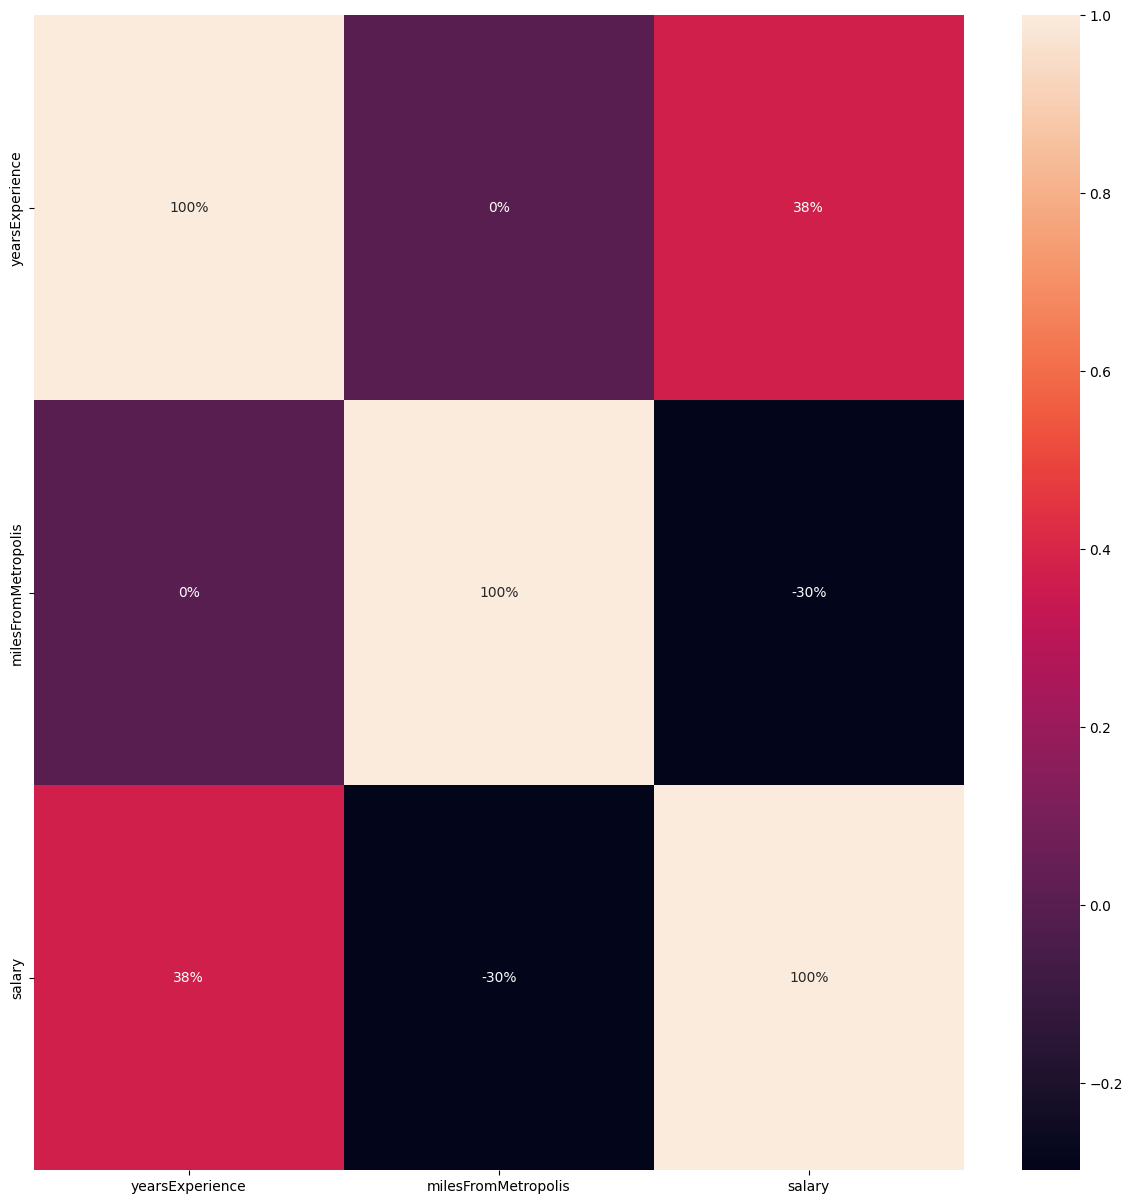

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.drop(['jobId','companyId'],axis=1).corr(),annot = True, fmt = '0.0%')

## **Number of Employees According to Category**

In [ ]:
jobTypeGrouped = data.groupby(by='jobType').count()
jobTypeGrouped

,jobId,companyId,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobType,,,,,,,,
ceo,124778,124778,124778,124778,124778,124778,124778,124778
cfo,124369,124369,124369,124369,124369,124369,124369,124369
cto,125046,125046,125046,125046,125046,125046,125046,125046
janitor,124971,124971,124971,124971,124971,124971,124971,124971
junior,124594,124594,124594,124594,124594,124594,124594,124594
manager,125121,125121,125121,125121,125121,125121,125121,125121
senior,125886,125886,125886,125886,125886,125886,125886,125886
vice_president,125235,125235,125235,125235,125235,125235,125235,125235


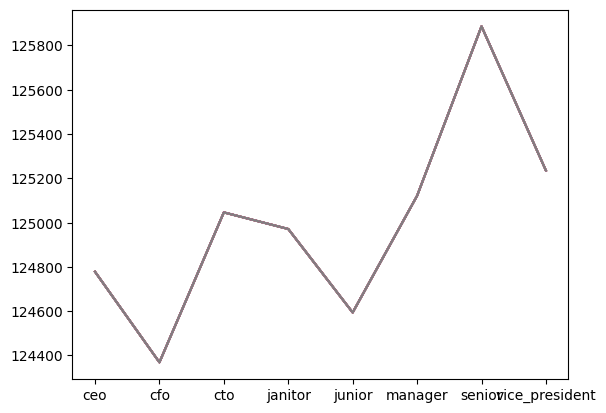

In [ ]:
plt.plot(jobTypeGrouped)
plt.show()

In [ ]:
DegreeGrouped = data.groupby(by='degree').count()
DegreeGrouped

,jobId,companyId,jobType,major,industry,yearsExperience,milesFromMetropolis,salary
degree,,,,,,,,
bachelors,175495,175495,175495,175495,175495,175495,175495,175495
doctoral,175364,175364,175364,175364,175364,175364,175364,175364
high_school,236976,236976,236976,236976,236976,236976,236976,236976
masters,175311,175311,175311,175311,175311,175311,175311,175311
none,236854,236854,236854,236854,236854,236854,236854,236854


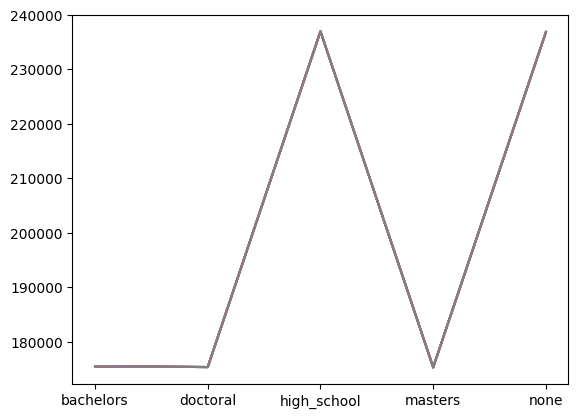

In [ ]:
plt.plot(DegreeGrouped)
plt.show()

<Figure size 2500x600 with 0 Axes>

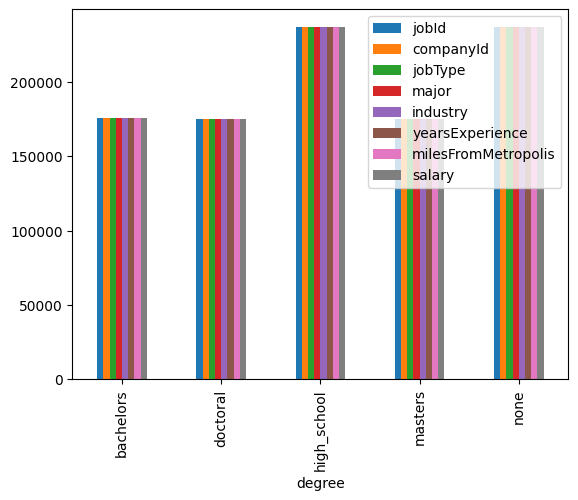

In [ ]:
plt.figure(figsize=(25,6))
DegreeGrouped.plot.bar()
plt.show()

In [ ]:
MajorGrouped = data.groupby(by='major').count()
MajorGrouped

,jobId,companyId,jobType,degree,industry,yearsExperience,milesFromMetropolis,salary
major,,,,,,,,
biology,58379,58379,58379,58379,58379,58379,58379,58379
business,58518,58518,58518,58518,58518,58518,58518,58518
chemistry,58875,58875,58875,58875,58875,58875,58875,58875
compsci,58382,58382,58382,58382,58382,58382,58382,58382
engineering,58596,58596,58596,58596,58596,58596,58596,58596
literature,58684,58684,58684,58684,58684,58684,58684,58684
math,57801,57801,57801,57801,57801,57801,57801,57801
none,532355,532355,532355,532355,532355,532355,532355,532355
physics,58410,58410,58410,58410,58410,58410,58410,58410


<Figure size 2500x1000 with 0 Axes>

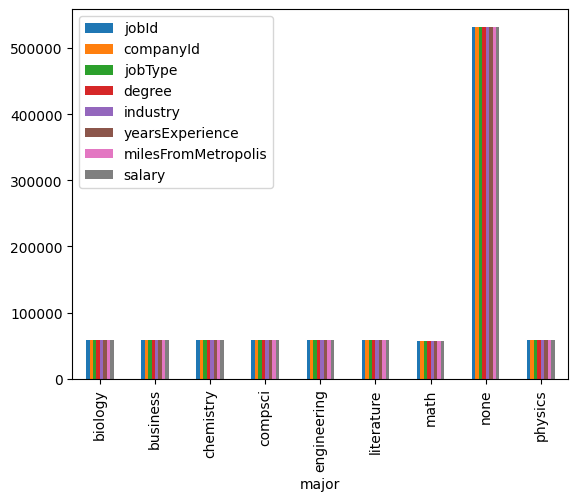

In [ ]:
plt.figure(figsize=(25,10))
MajorGrouped.plot.bar()
plt.show()

In [ ]:
IndustryGrouped = data.groupby(by='industry').count()
IndustryGrouped

,jobId,companyId,jobType,degree,major,yearsExperience,milesFromMetropolis,salary
industry,,,,,,,,
auto,142943,142943,142943,142943,142943,142943,142943,142943
education,142819,142819,142819,142819,142819,142819,142819,142819
finance,142867,142867,142867,142867,142867,142867,142867,142867
health,142755,142755,142755,142755,142755,142755,142755,142755
oil,142771,142771,142771,142771,142771,142771,142771,142771
service,142639,142639,142639,142639,142639,142639,142639,142639
web,143206,143206,143206,143206,143206,143206,143206,143206


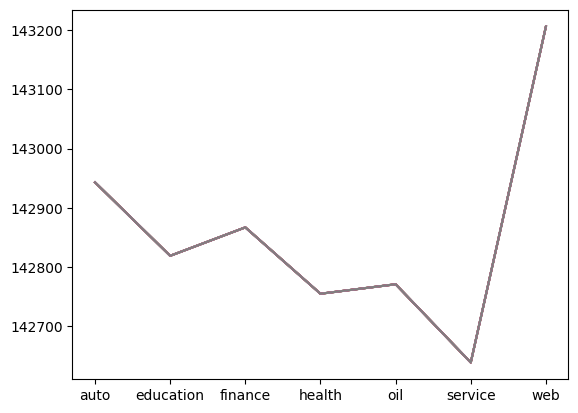

In [ ]:
plt.plot(IndustryGrouped)
plt.show()

<Figure size 2500x1000 with 0 Axes>

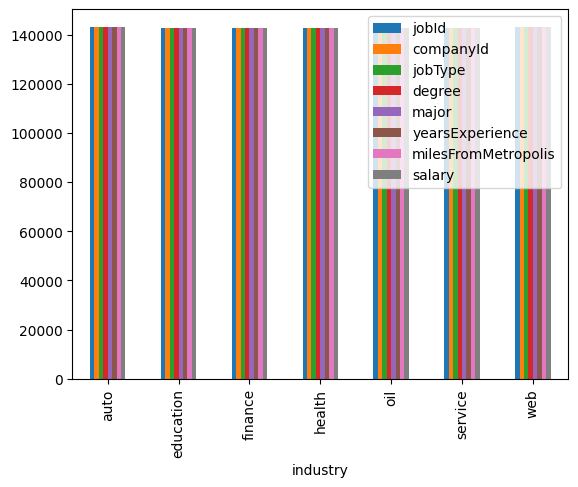

In [ ]:
plt.figure(figsize=(25,10))
IndustryGrouped.plot.bar()
plt.show()

## **Maximum Salary for each Category**

### **Job Type**

In [ ]:
data.groupby('jobType')['salary'].max().sort_values(ascending=False)

jobType
cfo               301
cto               301
ceo               298
vice_president    272
manager           270
senior            258
junior            248
janitor           189
Name: salary, dtype: int64

<Axes: ylabel='jobType'>

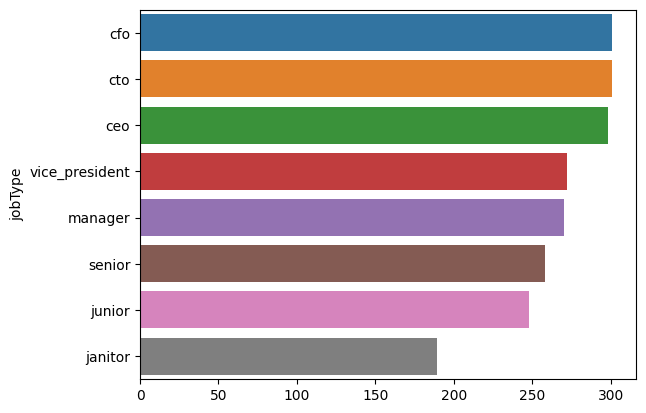

In [ ]:
sns.barplot(y = data.groupby('jobType')['salary'].max().sort_values(ascending=False).index, x = data.groupby('jobType')['salary'].max().sort_values(ascending=False).values)

### **Degree**

In [ ]:
data.groupby('degree')['salary'].max().sort_values(ascending=False)

degree
doctoral       301
masters        301
bachelors      294
high_school    260
none           254
Name: salary, dtype: int64

<Axes: ylabel='degree'>

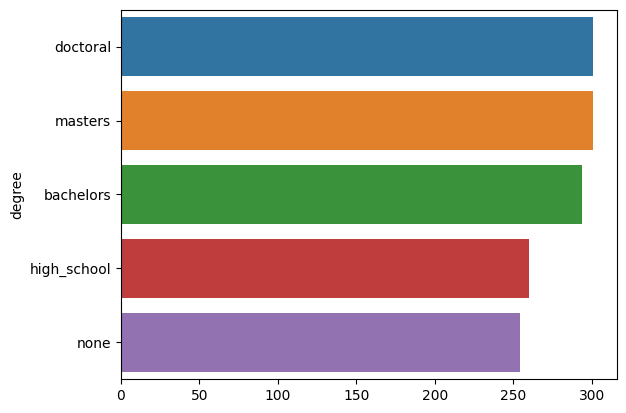

In [ ]:
sns.barplot(y = data.groupby('degree')['salary'].max().sort_values(ascending=False).index, x = data.groupby('degree')['salary'].max().sort_values(ascending=False).values)

### **Major**

In [ ]:
data.groupby('major')['salary'].max().sort_values(ascending=False)

major
engineering    301
business       294
physics        293
compsci        286
biology        285
chemistry      282
math           280
literature     271
none           270
Name: salary, dtype: int64

<Axes: ylabel='major'>

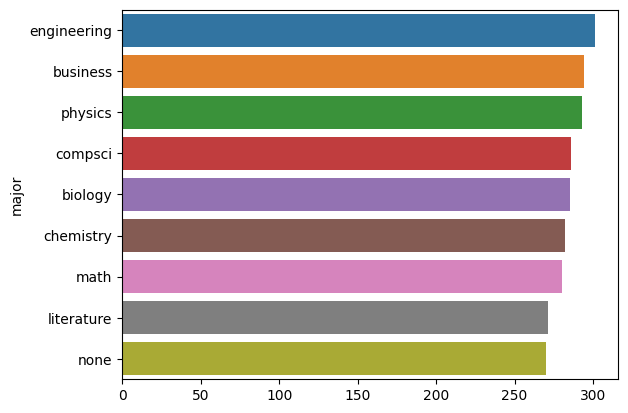

In [ ]:
sns.barplot(y = data.groupby('major')['salary'].max().sort_values(ascending=False).index, x = data.groupby('major')['salary'].max().sort_values(ascending=False).values)

### **Industry**

In [ ]:
data.groupby('industry')['salary'].max().sort_values(ascending=False)

industry
oil          301
finance      294
web          290
health       275
auto         264
service      256
education    253
Name: salary, dtype: int64

<Axes: ylabel='industry'>

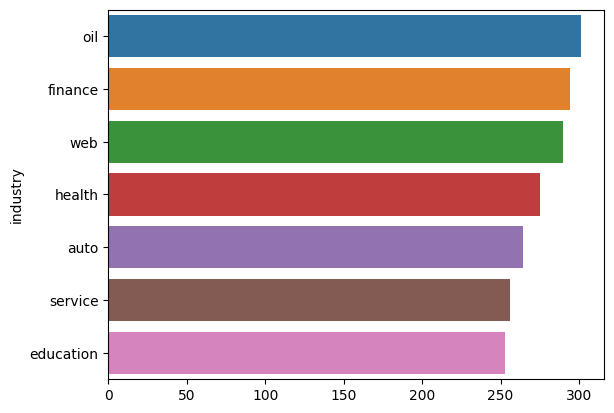

In [ ]:
sns.barplot(y = data.groupby('industry')['salary'].max().sort_values(ascending=False).index, x = data.groupby('industry')['salary'].max().sort_values(ascending=False).values)

### **Experience**

In [ ]:
data.groupby('yearsExperience')['salary'].max().sort_values(ascending=False)

yearsExperience
24.0    301
23.0    301
22.0    298
19.0    294
16.0    293
20.0    290
21.0    288
11.0    282
18.0    280
14.0    273
13.0    271
15.0    268
17.0    267
10.0    263
12.0    262
9.0     261
8.0     248
5.0     245
4.0     245
7.0     244
6.0     239
3.0     234
2.0     229
0.0     227
1.0     223
Name: salary, dtype: int64

<Axes: xlabel='yearsExperience'>

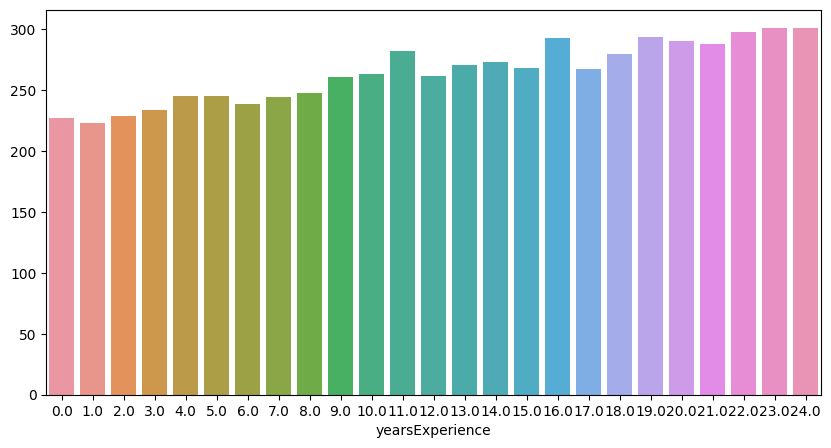

In [ ]:
plt.subplots(figsize=(10,5))
sns.barplot(x = data.groupby('yearsExperience')['salary'].max().sort_values(ascending=False).index, y = data.groupby('yearsExperience')['salary'].max().sort_values(ascending=False).values)

## **Top 10 Salaries**

In [ ]:
data.nlargest(10, 'salary')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
400611,1362684808298,45,cfo,doctoral,engineering,oil,23.0,3.0,301
685562,1362685093249,47,cto,masters,engineering,oil,24.0,0.0,301
572777,1362684980464,60,ceo,masters,engineering,oil,22.0,1.0,298
293221,1362684700908,44,ceo,doctoral,engineering,oil,19.0,18.0,294
911747,1362685319434,3,ceo,bachelors,business,finance,24.0,28.0,294
503962,1362684911649,3,ceo,doctoral,physics,oil,24.0,1.0,293
905713,1362685313400,35,ceo,doctoral,business,finance,16.0,17.0,293
47203,1362684454890,18,ceo,bachelors,business,finance,22.0,18.0,292
884902,1362685292589,1,cto,masters,business,finance,24.0,2.0,292
377196,1362684784883,5,ceo,doctoral,engineering,web,20.0,8.0,290


In [ ]:
data.nsmallest(10,'salary')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,1362684438246,44,junior,doctoral,math,auto,11.0,7.0,0
495984,1362684903671,34,junior,none,none,oil,1.0,25.0,0
652076,1362685059763,25,cto,high_school,none,auto,6.0,60.0,0
816129,1362685223816,42,manager,doctoral,engineering,finance,18.0,6.0,0
828156,1362685235843,40,vice_president,masters,engineering,web,3.0,29.0,0
141942,1362684549629,27,janitor,none,none,education,0.0,98.0,17
188931,1362684596618,26,janitor,high_school,none,education,1.0,96.0,18
482429,1362684890116,46,janitor,none,none,education,0.0,92.0,18
807108,1362685214795,29,janitor,high_school,none,education,0.0,92.0,18
60556,1362684468243,23,janitor,none,none,education,1.0,93.0,19


<ipython-input-57-7c628b2f3dd9>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='milesFromMetropolis',y='salary', data=data[:5000], palette='rainbow')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 24.6% of the points cannot be placed; you may want to decre

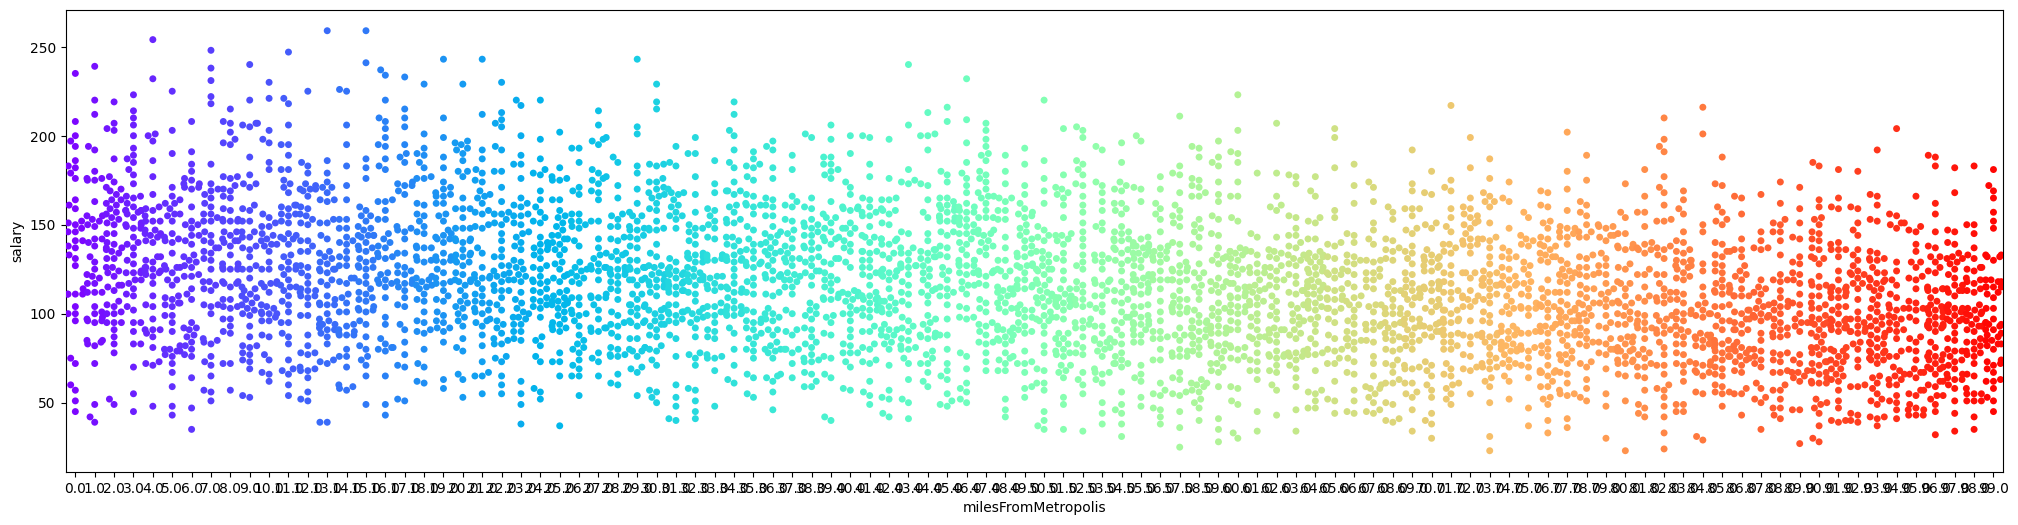

In [ ]:
plt.figure(figsize=(25,6))
sns.swarmplot(x='milesFromMetropolis',y='salary', data=data[:5000], palette='rainbow')
plt.show()

# **VIF (Varience Inflation Factor)**

In [51]:
def compute_vif(considered_features):

    V = data[considered_features]
    V['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = V.columns
    vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [52]:
data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [53]:
considered_features = ['jobId','companyId','yearsExperience','milesFromMetropolis','salary']

In [54]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-51-c9778607a97b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V['intercept'] = 1
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
4,salary,1.297680
2,yearsExperience,1.182697
3,milesFromMetropolis,1.115177
1,companyId,1.000006
0,jobId,1.000005


In [55]:
df = data[:100000]

In [56]:
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1362684407687,37,cfo,masters,math,health,10.0,83.0,130
1,1362684407688,19,ceo,high_school,none,web,3.0,73.0,101
2,1362684407689,52,vice_president,doctoral,physics,health,10.0,38.0,137
3,1362684407690,38,manager,doctoral,chemistry,auto,8.0,17.0,142
4,1362684407691,7,vice_president,bachelors,physics,finance,8.0,16.0,163
...,...,...,...,...,...,...,...,...,...
99995,1362684507682,60,cto,none,none,finance,8.0,1.0,138
99996,1362684507683,47,junior,high_school,none,service,20.0,45.0,76
99997,1362684507684,41,ceo,doctoral,engineering,finance,21.0,94.0,194
99998,1362684507685,31,cto,doctoral,business,service,12.0,74.0,113


# **Checking for & Removing Outliers**

In [66]:
z = np.abs(stats.zscore(df['salary']))
print(z)

0        0.386895
1        0.377416
2        0.571384
3        0.703162
4        1.256629
           ...   
99995    0.597740
99996    1.036305
99997    2.073652
99998    0.061149
99999    0.255118
Name: salary, Length: 99605, dtype: float64


In [67]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [68]:
df = df[(z < 3)]
df

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,1362684407687,37,cfo,masters,math,health,10.0,83.0,130
1,1362684407688,19,ceo,high_school,none,web,3.0,73.0,101
2,1362684407689,52,vice_president,doctoral,physics,health,10.0,38.0,137
3,1362684407690,38,manager,doctoral,chemistry,auto,8.0,17.0,142
4,1362684407691,7,vice_president,bachelors,physics,finance,8.0,16.0,163
...,...,...,...,...,...,...,...,...,...
99995,1362684507682,60,cto,none,none,finance,8.0,1.0,138
99996,1362684507683,47,junior,high_school,none,service,20.0,45.0,76
99997,1362684507684,41,ceo,doctoral,engineering,finance,21.0,94.0,194
99998,1362684507685,31,cto,doctoral,business,service,12.0,74.0,113


# **Scaling & Encoding**

In [69]:
obj_data_train = df[['yearsExperience','milesFromMetropolis']]
obj_cols_train = obj_data_train.columns

In [70]:
def scaled(df,cols):
    df = df[cols]
    trans = MinMaxScaler()
    df = trans.fit_transform(df)
    scaled_data = pd.DataFrame(df)
    scaled_data.columns = ['yearsExperience','milesFromMetropolis']
    return scaled_data
train_cols = [i for i in df.columns if df[i].dtypes != 'object']
train_scaled_data = scaled(obj_data_train,obj_cols_train)

In [71]:
train_cols

['jobId', 'companyId', 'yearsExperience', 'milesFromMetropolis', 'salary']

In [72]:
train_scaled_data

,yearsExperience,milesFromMetropolis
0,0.416667,0.838384
1,0.125000,0.737374
2,0.416667,0.383838
3,0.333333,0.171717
4,0.333333,0.161616
...,...,...
99600,0.333333,0.010101
99601,0.833333,0.454545
99602,0.875000,0.949495
99603,0.500000,0.747475


In [73]:
train_cat_cols = [i for i in df.columns if df.dtypes[i] == 'object']
cat_data = df[train_cat_cols]

In [74]:
cat_data

,jobType,degree,major,industry
0,cfo,masters,math,health
1,ceo,high_school,none,web
2,vice_president,doctoral,physics,health
3,manager,doctoral,chemistry,auto
4,vice_president,bachelors,physics,finance
...,...,...,...,...
99995,cto,none,none,finance
99996,junior,high_school,none,service
99997,ceo,doctoral,engineering,finance
99998,cto,doctoral,business,service


In [75]:
#encoder_target = OneHotEncoder()
encoded_features = pd.get_dummies(cat_data, prefix = train_cat_cols)
encoded_features

,jobType_ceo,jobType_cfo,jobType_cto,jobType_janitor,jobType_junior,jobType_manager,jobType_senior,jobType_vice_president,degree_bachelors,degree_doctoral,...,major_math,major_none,major_physics,industry_auto,industry_education,industry_finance,industry_health,industry_oil,industry_service,industry_web
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
99996,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
99997,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
99998,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [76]:
transformed_train_set = pd.concat([encoded_features.reset_index(drop=True),train_scaled_data.reset_index(drop=True)],axis=1)
transformed_train_set

,jobType_ceo,jobType_cfo,jobType_cto,jobType_janitor,jobType_junior,jobType_manager,jobType_senior,jobType_vice_president,degree_bachelors,degree_doctoral,...,major_physics,industry_auto,industry_education,industry_finance,industry_health,industry_oil,industry_service,industry_web,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.416667,0.838384
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.125000,0.737374
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0.416667,0.383838
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0.333333,0.171717
4,0,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0.333333,0.161616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99600,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.333333,0.010101
99601,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.833333,0.454545
99602,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0.875000,0.949495
99603,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0.500000,0.747475


In [77]:
transformed_train_set =  transformed_train_set.dropna()

In [78]:
transformed_train_set

,jobType_ceo,jobType_cfo,jobType_cto,jobType_janitor,jobType_junior,jobType_manager,jobType_senior,jobType_vice_president,degree_bachelors,degree_doctoral,...,major_physics,industry_auto,industry_education,industry_finance,industry_health,industry_oil,industry_service,industry_web,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.416667,0.838384
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.125000,0.737374
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0.416667,0.383838
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0.333333,0.171717
4,0,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0.333333,0.161616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99600,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.333333,0.010101
99601,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.833333,0.454545
99602,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0.875000,0.949495
99603,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0.500000,0.747475


# **Splitting Data Into Training and Testing Sets**

In [79]:
X = transformed_train_set
y = df['salary']

In [80]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# **Linear Regression**

## **Implementation**

In [ ]:
lr = LinearRegression(fit_intercept=False)
lr_model = lr.fit(X_train.values,y_train)

In [ ]:
lr_pred = lr_model.predict(X_test.values)

In [ ]:
lr_r2 = r2_score(y_test,lr_pred)

In [ ]:
lr_mae = mean_absolute_error(y_test,lr_pred)

In [ ]:
lr_mse = mean_squared_error(y_test,lr_pred)

In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test,lr_pred))

In [ ]:
lr_r2

0.7426833759199511

##**Feature Selection**

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=lr, step=1, cv=5,scoring='r2')   #5-fold cross-validation
rfecv = rfecv.fit(X_train.values, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])
(print("Feature ranking: ", rfecv.ranking_))

Optimal number of features : 31
Best features : Index(['jobType_ceo', 'jobType_cfo', 'jobType_cto', 'jobType_janitor',
       'jobType_junior', 'jobType_manager', 'jobType_senior',
       'jobType_vice_president', 'degree_bachelors', 'degree_doctoral',
       'degree_high_school', 'degree_masters', 'degree_none', 'major_biology',
       'major_business', 'major_chemistry', 'major_compsci',
       'major_engineering', 'major_literature', 'major_math', 'major_none',
       'major_physics', 'industry_auto', 'industry_education',
       'industry_finance', 'industry_health', 'industry_oil',
       'industry_service', 'industry_web', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')
Feature ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## **Grid Search**

In [ ]:
lr_parameters={'fit_intercept' : [True,False],
            'copy_X' : [True, False],
            'positive' : [True,False]
            }

In [ ]:
grid_lr = GridSearchCV(estimator=lr, param_grid = lr_parameters, n_jobs=-1)
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(fit_intercept=False), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_lr.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_lr.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_lr.best_params_)

 RESULTS FROM GRID SEARCH 

 The best estimator across all searched parameters:
 LinearRegression(fit_intercept=False)

 The best obtained score across all searched parameters:
 0.7396695575236489

 The best parameters across all searched parameters:
 {'copy_X': True, 'fit_intercept': False, 'positive': False}


# **Decision Tree Regressor**

## **Implementation**

In [ ]:
dtr =   DecisionTreeRegressor(max_depth=9, max_features='auto', max_leaf_nodes=90,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1,
                      splitter='random')
dtr_model = dtr.fit(X_train.values,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
dtr_pred = dtr_model.predict(X_test.values)

In [ ]:
dtr_r2 = r2_score(y_test,dtr_pred)

In [ ]:
dtr_mae = mean_absolute_error(y_test,dtr_pred)

In [ ]:
dtr_mse = mean_squared_error(y_test,dtr_pred)

In [ ]:
dtr_rmse = np.sqrt(mean_squared_error(y_test,dtr_pred))

In [ ]:
dtr_r2

0.41610387629313894

## **Grid Search**

In [ ]:
dtr_parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
grid_dtr = GridSearchCV(estimator=dtr, param_grid = dtr_parameters,cv = 2, n_jobs=-1)
grid_dtr.fit(X_train, y_train)

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_dtr.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_dtr.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_dtr.best_params_)

# **Random Forest Regressor**

## **Implementation**

In [ ]:
#rfr = RandomForestRegressor(random_state=42, n_estimators = 1000, min_samples_split = 5)
#rfr_model = rfr.fit(X_train,y_train)

In [ ]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train.values,y_train)

In [ ]:
rfr_pred = rfr_model.predict(X_test.values)

In [ ]:
rfr_r2 = r2_score(y_test,rfr_pred)

In [ ]:
rfr_mae = mean_absolute_error(y_test,rfr_pred)

In [ ]:
rfr_mse = mean_squared_error(y_test,rfr_pred)

In [ ]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))

In [ ]:
rfr_r2

0.714056150797052

## **Grid Search**

In [ ]:
rfr_parameters={'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
            'max_features': ['auto','sqrt','log2',None],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
            'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"]

            }


In [ ]:
grid_rfr = GridSearchCV(estimator=rfr, param_grid = rfr_parameters, cv = 2, n_jobs=-1,verbose = True)
grid_rfr.fit(X_train.values, y_train)

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_rfr.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_rfr.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_rfr.best_params_)

# **Gradient Boosting Regressor**

## **Implementation**

In [ ]:
#gbr = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 1500, subsample = 0.9)
#gbr_model = gbr.fit(X_train,y_train)

In [ ]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(X_train.values,y_train)

In [ ]:
gbr_pred = gbr_model.predict(X_test.values)

In [ ]:
gbr_r2 = r2_score(y_test,gbr_pred)

In [ ]:
gbr_mae = mean_absolute_error(y_test,gbr_pred)

In [ ]:
gbr_mse = mean_squared_error(y_test,gbr_pred)

In [ ]:
gbr_rmse = np.sqrt(mean_squared_error(y_test,gbr_pred))

In [ ]:
gbr_r2

0.7479330765585781

##**Grid Search**

In [ ]:
 gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid_GBR = GridSearchCV(estimator=gbr, param_grid = gbr_parameters, cv = 2, n_jobs=-1,verbose = True)
grid_GBR.fit(X_train, y_train)

Fitting 2 folds for each of 256 candidates, totalling 512 fits


In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_GBR.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_GBR.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_GBR.best_params_)

#**Adaptive Boosting Regressor**

In [ ]:
abr = AdaBoostRegressor()
abr_model = abr.fit(X_train.values,y_train)

In [ ]:
abr_pred = abr_model.predict(X_test.values)

In [ ]:
abr_r2 = r2_score(y_test,abr_pred)

In [ ]:
abr_mae = mean_absolute_error(y_test,abr_pred)

In [ ]:
abr_mse = mean_squared_error(y_test,abr_pred)

In [ ]:
abr_rmse = np.sqrt(mean_squared_error(y_test,abr_pred))

In [ ]:
abr_r2

0.5491660817381598

# **XG Boosting Regressor**

## **Implementation**

In [ ]:
#xgb = XGBRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 1500, subsample=0.5)
#xgb_model = xgb.fit(X_train,y_train)

In [ ]:
xgb = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.03, max_depth = 5, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
xgb_model = xgb.fit(X_train.values,y_train)

[06:48:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[06:48:29] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
xgb_pred = xgb_model.predict(X_test.values)

In [ ]:
xgb_r2 = r2_score(y_test,xgb_pred)

In [ ]:
xgb_mae = mean_absolute_error(y_test,xgb_pred)

In [ ]:
xgb_mse = mean_squared_error(y_test,xgb_pred)

In [ ]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [ ]:
xgb_r2

0.7582681157404227

## **Grid Search**

In [ ]:
xgb_parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [ ]:
grid_XGB = GridSearchCV(estimator=xgb, param_grid = xgb_parameters, cv = 2, n_jobs=-1, verbose = True)
grid_XGB.fit(X_train, y_train)

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_XGB.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_XGB.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_XGB.best_params_)

# **Support Vector Regressor**

## **Implementation**

In [ ]:
svr = SVR(C=10, gamma=0.1)
svr_model = svr.fit(X_train.values,y_train)

In [ ]:
svr_pred = svr_model.predict(X_test.values)

In [ ]:
svr_r2 = r2_score(y_test,svr_pred)

In [ ]:
svr_mae = mean_absolute_error(y_test,svr_pred)

In [ ]:
svr_mse = mean_squared_error(y_test,svr_pred)

In [ ]:
svr_rmse = np.sqrt(mean_squared_error(y_test,svr_pred))

In [ ]:
svr_r2

0.7583591041803346

## **Grid Search**

In [ ]:
svr_parameters = {'C': [0.1,1, 10],
                  'gamma': [0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid_SVR = GridSearchCV(estimator=svr, param_grid = svr_parameters, cv = 2, n_jobs=-1, verbose = 2)
grid_SVR.fit(X_train, y_train)

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_SVR.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_SVR.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_SVR.best_params_)

# **Bagging Regressor**

## **Implementation**

In [ ]:
br = BaggingRegressor(max_features=0.5, max_samples=0.5, n_estimators=100)
br_model = br.fit(X_train.values,y_train)

In [ ]:
br_pred = br_model.predict(X_test.values)

In [ ]:
br_r2 = r2_score(y_test,br_pred)

In [ ]:
br_mae = mean_absolute_error(y_test,br_pred)

In [ ]:
br_mse = mean_squared_error(y_test,br_pred)

In [ ]:
br_rmse = np.sqrt(mean_squared_error(y_test,br_pred))

In [ ]:
br_r2

0.6126732324127903

## **Grid Search**

In [ ]:
br_parameters = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'bootstrap' : [True,False],
    'bootstrap_features' : [True,False]
}

In [ ]:
grid_br = GridSearchCV(BaggingRegressor(n_estimators = 100, max_features = 0.5),
                   br_parameters)
grid_br.fit(X_train.values, y_train)

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_br.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_br.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_br.best_params_)

#**KNN**

## **Implementation**

In [ ]:
r2_val = {}
for K in range(50):
    K = K+1
    knn = KNeighborsRegressor(n_neighbors = K)
    knn_model = knn.fit(X_train.values,y_train)
    knn_pred = knn_model.predict(X_test.values)
    knn_r2 = r2_score(y_test,knn_pred)
    r2_val[K] = knn_r2

In [ ]:
keymax = max(zip(r2_val.values(), r2_val.keys()))[1]
print(keymax)

50


<Axes: >

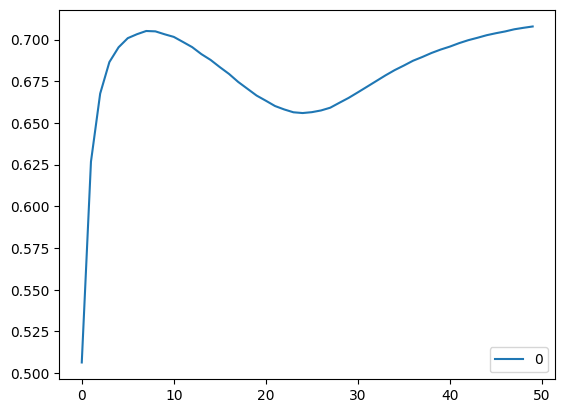

In [ ]:
curve = pd.DataFrame(r2_val.values()) #elbow curve
curve.plot()

In [ ]:
knn = KNeighborsRegressor(algorithm='brute', leaf_size=10, n_neighbors=6,
                    weights='distance')

knn_model = knn.fit(X_train.values,y_train)

In [ ]:
knn_pred = knn_model.predict(X_test.values)

In [ ]:
knn_r2 = r2_score(y_test,knn_pred)

In [ ]:
knn_mse = mean_squared_error(y_test,knn_pred)

In [ ]:
knn_mae = mean_absolute_error(y_test,knn_pred)

In [ ]:
knn_rmse = np.sqrt(mean_squared_error(y_test,knn_pred))

In [ ]:
knn_r2

0.6866524431347417

## **Grid Search**

In [ ]:
knn_parameters = {
   'weights' : ['uniform', 'distance',None],
   'algorithm' : ['auto','ball_tree','kd_tree','brute'],
   'leaf_size' : [0,10,20,30,40,50,60]
}

In [ ]:
grid_knn = GridSearchCV(estimator=knn, param_grid = knn_parameters, cv = 2, n_jobs=-1, verbose = True)
grid_knn.fit(X_train, y_train)

In [ ]:
print(" RESULTS FROM GRID SEARCH " )
print("\n The best estimator across all searched parameters:\n",grid_knn.best_estimator_)
print("\n The best obtained score across all searched parameters:\n",grid_knn.best_score_)
print("\n The best parameters across all searched parameters:\n",grid_knn.best_params_)

# **Comparing Scores**

In [ ]:
metrics = {'Linear Regression' : [lr_r2,lr_mae,lr_mse,lr_rmse],
       'Decision Tree Regressor': [dtr_r2,dtr_mae,dtr_mse,dtr_rmse],
       'Random Forest Regressor': [rfr_r2,rfr_mae,rfr_mse,rfr_rmse],
       'XGB Regressor': [xgb_r2,xgb_mae,xgb_mse,xgb_rmse],
       'Gradient Boosting Regressor': [gbr_r2,gbr_mae,gbr_mse,gbr_rmse],
       'Support Vector Machine': [svr_r2,svr_mae,svr_mse,svr_rmse],
       'Bagging Regressor': [br_r2,br_mae,br_mse,br_rmse],
       'K-Neighbors Regressor' : [knn_r2,knn_mae,knn_mse,knn_rmse]
       }

eval_metrics = (pd.DataFrame(metrics, index=['R-Squared','MAE','MSE','RMSE'])).transpose()

eval_metrics.sort_values(by=['R-Squared'],ascending = False)

,R-Squared,MAE,MSE,RMSE
Support Vector Machine,0.758359,15.265268,350.704720,18.727112
XGB Regressor,0.758268,15.275022,350.836776,18.730637
Gradient Boosting Regressor,0.747933,15.516043,365.836501,19.126853
Linear Regression,0.742683,15.682054,373.455637,19.325000
Random Forest Regressor,0.714056,16.358408,415.003666,20.371639
K-Neighbors Regressor,0.686652,16.968257,454.775947,21.325476
Bagging Regressor,0.612673,19.297882,562.145431,23.709606
Decision Tree Regressor,0.416104,23.416726,847.435720,29.110749


#**Testing Data**

In [81]:
test_data = pd.read_csv('/content/drive/MyDrive/data/emp_test.csv')
test_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...,...,...
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63


##**Cleaning Test Data**

In [82]:
test_data = test_data[test_data['yearsExperience'].notna()]
test_data = test_data[test_data['milesFromMetropolis'].notna()]

In [83]:
test_data = test_data.astype(str)

In [84]:
columns = ['companyID','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
for columns in test_data:
    test_data[columns] = test_data[columns].str.lower()

In [85]:
test_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,job1362685407687,comp33,manager,high_school,none,health,22,73
1,job1362685407688,comp13,junior,none,none,auto,20,47
2,job1362685407689,comp10,cto,masters,biology,health,17,9
3,job1362685407690,comp21,manager,high_school,none,oil,14,96
4,job1362685407691,comp36,junior,doctoral,biology,oil,10,44
...,...,...,...,...,...,...,...,...
999995,job1362686407682,comp54,vice_president,bachelors,math,oil,14,3
999996,job1362686407683,comp5,manager,none,none,health,20,67
999997,job1362686407684,comp61,janitor,none,none,oil,1,91
999998,job1362686407685,comp19,cto,doctoral,math,oil,14,63


In [86]:
test_data['companyId'] = test_data['companyId'].str.replace("comp","")
test_data['jobId'] = test_data['jobId'].str.replace("job","")

In [87]:
test_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,1362685407687,33,manager,high_school,none,health,22,73
1,1362685407688,13,junior,none,none,auto,20,47
2,1362685407689,10,cto,masters,biology,health,17,9
3,1362685407690,21,manager,high_school,none,oil,14,96
4,1362685407691,36,junior,doctoral,biology,oil,10,44
...,...,...,...,...,...,...,...,...
999995,1362686407682,54,vice_president,bachelors,math,oil,14,3
999996,1362686407683,5,manager,none,none,health,20,67
999997,1362686407684,61,janitor,none,none,oil,1,91
999998,1362686407685,19,cto,doctoral,math,oil,14,63


In [88]:
test_data.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience        object
milesFromMetropolis    object
dtype: object

In [89]:
columns = ['jobId']
for columns in test_data:
    test_data[columns] = test_data[columns].str.lower()

In [90]:
test_data['jobId'] = test_data['jobId'].str.replace("job","")

In [91]:
test_data['jobId'] = test_data['jobId'].astype(np.int64)
test_data['companyId'] = test_data['companyId'].astype(np.int64)
test_data['yearsExperience'] = test_data['yearsExperience'].astype(float)
test_data['milesFromMetropolis'] = test_data['milesFromMetropolis'].astype(float)

In [92]:
test_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,1362685407687,33,manager,high_school,none,health,22.0,73.0
1,1362685407688,13,junior,none,none,auto,20.0,47.0
2,1362685407689,10,cto,masters,biology,health,17.0,9.0
3,1362685407690,21,manager,high_school,none,oil,14.0,96.0
4,1362685407691,36,junior,doctoral,biology,oil,10.0,44.0
...,...,...,...,...,...,...,...,...
999995,1362686407682,54,vice_president,bachelors,math,oil,14.0,3.0
999996,1362686407683,5,manager,none,none,health,20.0,67.0
999997,1362686407684,61,janitor,none,none,oil,1.0,91.0
999998,1362686407685,19,cto,doctoral,math,oil,14.0,63.0


## **Scaling Test Data**

In [93]:
test_data = test_data

In [94]:
obj_data_test = test_data[['yearsExperience','milesFromMetropolis']]
obj_cols_test = obj_data_test.columns

In [95]:
def scaled(data,cols):
    data = data[cols]
    trans = MinMaxScaler()
    data = trans.fit_transform(data)
    scaled_data = pd.DataFrame(data)
    scaled_data.columns = ['yearsExperience','milesFromMetropolis']
    return scaled_data
test_cols = [i for i in test_data.columns if test_data[i].dtypes != 'object']
test_scaled_data = scaled(obj_data_test,obj_cols_test)

In [96]:
test_scaled_data

,yearsExperience,milesFromMetropolis
0,0.916667,0.737374
1,0.833333,0.474747
2,0.708333,0.090909
3,0.583333,0.969697
4,0.416667,0.444444
...,...,...
999995,0.583333,0.030303
999996,0.833333,0.676768
999997,0.041667,0.919192
999998,0.583333,0.636364


In [97]:
test_cat_cols = [i for i in test_data.columns if test_data.dtypes[i] == 'object']
cat_data = test_data[test_cat_cols]

In [98]:
test_encoded_features = pd.get_dummies(cat_data, prefix = test_cat_cols)
test_encoded_features

,jobType_ceo,jobType_cfo,jobType_cto,jobType_janitor,jobType_junior,jobType_manager,jobType_senior,jobType_vice_president,degree_bachelors,degree_doctoral,...,major_math,major_none,major_physics,industry_auto,industry_education,industry_finance,industry_health,industry_oil,industry_service,industry_web
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
999996,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
999997,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
999998,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [99]:
transformed_test_set = pd.concat([test_encoded_features.reset_index(drop=True),test_scaled_data.reset_index(drop=True)],axis=1)
transformed_test_set

,jobType_ceo,jobType_cfo,jobType_cto,jobType_janitor,jobType_junior,jobType_manager,jobType_senior,jobType_vice_president,degree_bachelors,degree_doctoral,...,major_physics,industry_auto,industry_education,industry_finance,industry_health,industry_oil,industry_service,industry_web,yearsExperience,milesFromMetropolis
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.916667,0.737374
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.833333,0.474747
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.708333,0.090909
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.583333,0.969697
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.416667,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0.583333,0.030303
999996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.833333,0.676768
999997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.041667,0.919192
999998,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.583333,0.636364


##**Making Predictions**

In [100]:
model = XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.01, max_depth = 7, min_child_weight = 7, n_estimators = 500, objective = 'reg:squarederror', subsample = 0.5)

In [101]:
model.fit(X_train.values,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
transformed_test_set

,jobType_ceo,jobType_cfo,jobType_cto,jobType_janitor,jobType_junior,jobType_manager,jobType_senior,jobType_vice_president,degree_bachelors,degree_doctoral,...,major_physics,industry_auto,industry_education,industry_finance,industry_health,industry_oil,industry_service,industry_web,yearsExperience,milesFromMetropolis
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.916667,0.737374
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.833333,0.474747
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.708333,0.090909
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.583333,0.969697
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.416667,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0.583333,0.030303
999996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0.833333,0.676768
999997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.041667,0.919192
999998,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0.583333,0.636364


In [103]:
test_pred_y = model.predict(transformed_test_set.values)

In [104]:
prediction = pd.DataFrame(test_pred_y)

In [105]:
prediction

,0
0,111.815628
1,95.989418
2,172.151169
3,105.145660
4,117.168098
...,...
999995,159.260880
999996,106.157829
999997,54.366653
999998,154.990631
